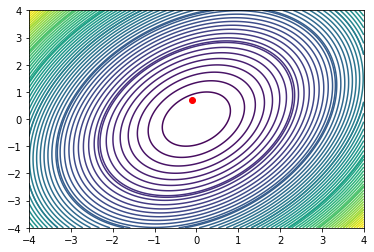

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f1(x): #simple function with 1 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 # + 3* np.exp(-x[0]**2)

def f2(x): #complex function with 2 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-x[0]**2)
    #return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

#def f2(x):
#    p = np.exp(-(x[0]/4-x[1]/1)**2)
#    return p

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()

In [31]:
# Draft version starting from Lec 15

def derivative2(f, x_y, d=0.001):
    x, y = x_y[0], x_y[1]
    df_dx = (f([x+d, y]) - f([x, y]))/d
    df_dy = (f([x, y+d]) - f([x, y]))/d
    return np.array([df_dx, df_dy])

def minimize2(f, x_y, gamma=0.01, N=1000):
    x0, y0 = x_y[0], x_y[1]
    [x_now, y_now] = [x0, y0] 
    converged = False
    x_y_hist = []
    x_y_hist.append([x0, y0])
    
    for i in range(N):
        [x_next, y_next] = np.array([x_now, y_now]) - derivative2(f, [x_now, y_now])*gamma
        if f([x_next, y_next]) < f([x_now, y_now]):
            x_now, y_now = x_next, y_next
            x_y_hist.append([x_now, y_now])
            #print('New position: x=', x_now)
        else:
            converged = True
            break
    return converged, [x_now, y_now], f([x_now, y_now]), np.array(x_y_hist)

In [12]:
derivative2(f1, [0, 0])

[0.005, 0.0033333333333333335]

In [32]:
minimize2(f1, [-4, 4])

(False,
 [0.002957957629954753, 0.006185108566867782],
 1.2552790395584578e-05,
 array([[-4.00000000e+00,  4.00000000e+00],
        [-3.95000500e+00,  3.96333000e+00],
        [-3.90060162e+00,  3.92702945e+00],
        ...,
        [ 2.99648789e-03,  6.26005802e-03],
        [ 2.97717316e-03,  6.22248218e-03],
        [ 2.95795763e-03,  6.18510857e-03]]))